In [33]:
import numpy as np
from sklearn.cluster import KMeans
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
% matplotlib inline 

In [21]:
df = pd.read_csv("skeleton1.csv", delimiter=";")
kmeans = KMeans(n_clusters=8, random_state=0).fit(df)
print(kmeans.labels_)
# kmeans.predict([[unseen data goes here]])
# kmeans.cluster_centers_

[1 1 1 ..., 4 4 4]


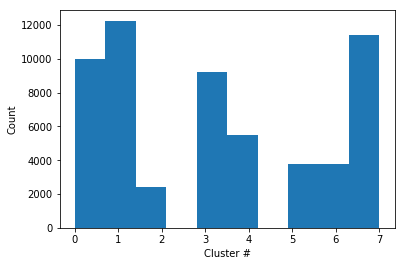

In [37]:
plt.hist(kmeans.labels_)
plt.xlabel('Cluster #')
plt.ylabel('Count')
plt.show()

Once we have the header for the Kinect data we can follow up on what body positions these clusters correspond to and try

(1) Find average of position of each skelton.joint.cluster
(2) Visualization of joint.clusters 
(3) Markov state transition diagram of those body positions
(4) label all data points according to their cluster, name those clusters and something like "active", "passive" "happy".


In [40]:
# Now just need to label coloumns 
# of df with the kmeans_labels_values
df['ClusterLabel'] = kmeans.labels_
df

,0,0.1,0.2,0.3,0.4,0.5,180,0.6,0.7,0.8,0.9,180.1,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,180.2,0.18,0.19,0.20,0.21,180.3,0.22,0.23,-0.2870422,0.1092077,1.312098,1,0.24,20.4901,2.552565,0.5657188,1.1,0.25,20.4901.1,2.552565.1,0.5657188.1,1.2,-0.249627,0.2782028,1.302606,1.3,0.26,-2.697718,2.320844,-12.58453,1.4,0.27,-22.79487,180.4,-13.11165,1.5,-0.3955587,-0.02014959,1.266056,1.6,0.28,20.49009,2.552578,142.5751,1.7,0.29,-1.024528E-05,-180,142.0093,1.8,-0.4413033,-0.192975,1.178452,1.9,0.30,13.74134,-36.54461,153.4736,1.10,0.31,-18.68366,-146.8145,17.43828,1.11,-0.3974432,-0.3131529,0.9846109,1.12,0.32,38.54467,-61.36415,140.0569,1.13,0.33,-33.95623,-180.1,-1.10442E-06,1.14,-0.3828232,-0.3532122,0.9233004,1.15,0.34,38.22141,-60.61204,141.7392,1.16,0.35,0.8195264,-179.9838,1.130276,1.17,-0.1277641,-0.01768652,1.255086,1.18,0.36,20.4901.2,2.552551,-130.1434,1.19,0.37,-8.537737E-06,180.5,-130.7091,1.20,-0.1456475,-0.1784974,1.189137,1.21,0.38,18.70538,49.08286,-167.3978,1.22,0.39,-30.90794,151.9831,-45.41055,1.23,-0.2923386,-0.2498918,1.020284,1.24,0.40,45.93496,77.01786,-145.9146,1.25,0.41,-40.63297,180.6,-2.775378E-06,1.26,-0.3419113,-0.2859204,0.9840299,1.27,0.42,43.16459,70.18965,-165.9319,1.28,0.43,9.938189,177.4922,-14.10205,1.29,0.44,0.45,0.46,0.47,0.48,0.49,180.7,0.50,0.51,0.52,0.53,180.8,0.54,0.55,0.56,0.57,0.58,0.59,0.60,0.61,180.9,0.62,0.63,0.64,0.65,180.10,0.66,0.67,0.68,0.69,0.70,0.71,0.72,0.73,180.11,0.74,0.75,0.76,0.77,180.12,0.78,0.79,0.80,0.81,0.82,0.83,0.84,0.85,180.13,0.86,0.87,0.88,0.89,180.14,0.90,0.91,0.92,0.93,0.94,0.95,0.96,0.97,180.15,0.98,0.99,0.100,0.101,180.16,0.102,0.103,0.104,0.105,0.106,0.107,0.108,0.109,180.17,0.110,0.111,0.112,0.113,180.18,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,180.19,0.122,0.123,0.124,0.125,180.20,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,180.21,0.134,0.135,0.136,0.137,180.22,0.138,0.139,0.140,0.141,0.142,0.143,0.144,0.145,0.146,0.147,0.148,0.149,0.150,0.151,0.152,0.153,0.154,0.155,0.156,0.157,0.158,0.159,0.160,0.161,0.162,0.163,0.164,0.165,0.166,0.167,0.168,0.169,0.170,0.171,0.172,0.173,0.174,0.175,0.176,0.177,0.178,0.179,0.180,0.181,0.182,0.183,0.184,0.185,0.186,0.187,0.188,0.189,0.190,0.191,0.192,0.193,0.194,0.195,0.196,0.197,0.198,0.199,0.200,0.201,0.202,0.203,0.204,0.205,0.206,0.207,0.208,0.209,0.210,0.211,0.212,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222,0.223,0.224,0.225,0.226,0.227,0.228,0.229,0.230,0.231,0.232,0.233,0.234,0.235,0.236,0.237,0.238,0.239,0.240,0.241,0.242,0.243,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.252,0.253,0.254,0.255,0.256,0.257,0.258,0.259,0.260,0.261,0.262,0.263,0.264,0.265,0.266,0.267,0.268,0.269,0.270,0.271,0.272,0.273,0.274,0.275,0.276,0.277,0.278,0.279,0.280,0.281,0.282,0.283,0.284,0.285,0.286,0.287,0.288,0.289,0.290,0.291,0.292,0.293,0.294,0.295,0.296,0.297,0.298,0.299,0.300,0.301,0.302,0.303,0.304,0.305,0.306,0.307,0.308,0.309,0.310,0.311,0.312,0.313,0.314,0.315,0.316,0.317,0.318,0.319,0.320,0.321,0.322,0.323,0.324,0.325,0.326,0.327,0.328,0.329,0.330,0.331,0.332,0.333,0.334,0.335,0.336,0.337,0.338,0.339,0.340,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350,0.351,0.352,0.353,0.354,0.355,0.356,0.357,0.358,0.359,0.360,0.361,0.362,0.363,0.364,0.365,0.366,0.367,0.368,0.369,0.370,0.371,0.372,0.373,0.374,0.375,0.376,0.377,0.378,0.379,0.380,0.381,0.382,0.383,0.384,0.385,0.386,0.387,0.388,0.389,0.390,0.391,0.392,0.393,0.394,0.395,0.396,0.397,0.398,0.399,0.400,0.401,0.402,0.403,0.404,0.405,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415,0.416,0.417,0.418,0.419,ClusterLabel
0,0,0,0,0,0,0,180,0,0,0,0,180,0,0,0,0,0,0,0,0,180,0,0,0,0,180,0,0,-0.286543,0.109445,1.311690,1,0,20.228620,2.212749,0.150394,1,0,20.228620,2.212749,0.150394,1,-0.250068,0.278273,1.301877,1,0,-2.858319,2.151469,-12.287440,1,0,-22.677330,180.0,-12.427870,1,-0.396819,-0.019422,1.266055,1.0,0,20.228630,2.212735,141.8773,1.0,0,1.707547e-05,180.0,141.72690,1.0,-0.441803,-0.192092,1.178703,1.0,0,13.838650,-36.51795,153.6649,1.0,

In [41]:
a = df["ClusterLabel"]##= df["EID"]
c = df["0.206"]
CrossDat = pd.crosstab(c, [a], rownames=['IncidentName'], colnames=['ActionNameOffender'])

In [51]:
# Group by cluster for individual cluster analysis
clusters = df.groupby('ClusterLabel')
cluster1 = clusters.get_group(1)
cluster1centroid = cluster1.mean()
# Eventually we can visualize this
# Perhaps this gets us the most prevalent positions... 

<bound method DataFrame.mean of        0  0.1  0.2  0.3  0.4  0.5  180  0.6  0.7  0.8  0.9  180.1  0.10  0.11  \
0      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
1      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
2      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
3      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
4      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
5      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
6      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
7      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
8      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
9      0    0    0    0    0    0  180    0    0    0    0    180     0     0   
10     0    0    0    0    0    0  180    0    0    0    0    180     0     0